In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Rectangle, ConnectionPatch, Arc
import seaborn

Players = pd.read_json('players/players.json',encoding = "utf-8")
Events = pd.read_json('events/events_Spain.json')
#Teams = pd.read_json('teams/teams.json')
Matches = pd.read_json('matches/matches_Spain.json')

In [10]:
Match_Barcelona_RealMadrid = Matches[Matches['label'] == 'Barcelona - Real Madrid, 2 - 2'].iloc[0]
id_Match_Barcelona_RealMadrid = Match_Barcelona_RealMadrid['wyId']

Player_L_Messi = Players[Players['shortName']=='L. Messi'].iloc[0]
id_L_Messi = Player_L_Messi['wyId']
Player_C_Ronaldo = Players[Players['shortName']=='Cristiano Ronaldo'].iloc[0]
id_C_Ronaldo = Player_C_Ronaldo['wyId']

In [11]:
Event_Ronaldo = Events[(Events['playerId']==id_C_Ronaldo)&(Events['matchId']==id_Match_Barcelona_RealMadrid)]
Event_Messi = Events[(Events['playerId']==id_L_Messi)&(Events['matchId']==id_Match_Barcelona_RealMadrid)]

In [26]:
Event_Messi

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
593485,8,Simple pass,[{'id': 1801}],3359,"[{'y': 87, 'x': 74}, {'y': 91, 'x': 80}]",2565907,Pass,676,1H,85.701277,85,249644574
593489,8,Simple pass,[{'id': 1801}],3359,"[{'y': 87, 'x': 67}, {'y': 71, 'x': 43}]",2565907,Pass,676,1H,92.114223,85,249644578
593499,8,Simple pass,[{'id': 1801}],3359,"[{'y': 66, 'x': 58}, {'y': 78, 'x': 75}]",2565907,Pass,676,1H,117.241765,85,249644587
593501,1,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",3359,"[{'y': 67, 'x': 65}, {'y': 38, 'x': 63}]",2565907,Duel,676,1H,122.168204,11,249644589
593503,8,Simple pass,[{'id': 1801}],3359,"[{'y': 38, 'x': 63}, {'y': 43, 'x': 69}]",2565907,Pass,676,1H,124.686582,85,249644590
...,...,...,...,...,...,...,...,...,...,...,...,...
595053,1,Ground attacking duel,"[{'id': 503}, {'id': 703}, {'id': 1801}]",3359,"[{'y': 76, 'x': 84}, {'y': 72, 'x': 96}]",2565907,Duel,676,2H,2197.469246,11,249646165
595055,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1206}, {'id'...",3359,"[{'y': 72, 'x': 96}, {'y': 0, 'x': 0}]",2565907,Shot,676,2H,2199.766741,100,249646166
595106,1,Ground attacking duel,"[{'id': 602}, {'id': 702}, {'id': 1801}]",3359,"[{'y': 83, 'x': 44}, {'y': 93, 'x': 36}]",2565907,Duel,676,2H,2411.569686,11,249646184
595131,8,Launch,[{'id': 1802}],3359,"[{'y': 8, 'x': 44}, {'y': 42, 'x': 63}]",2565907,Pass,676,2H,2558.961654,84,249646196


In [13]:
Event_Ronaldo = Event_Ronaldo[(Event_Ronaldo['eventName']=='Duel')|(Event_Ronaldo['eventName']=='Free Kick')|(Event_Ronaldo['eventName']=='Pass')|(Event_Ronaldo['eventName']=='Shot')]
Event_Messi = Event_Messi[(Event_Messi['eventName']=='Duel')|(Event_Messi['eventName']=='Free Kick')|(Event_Messi['eventName']=='Pass')|(Event_Messi['eventName']=='Shot')]

In [14]:
Positions_Event_Ronaldo =  Event_Ronaldo['positions']
Positions_Event_Messi = Event_Messi['positions']

In [15]:
Positions_Event_Ronaldo

593473      [{'y': 19, 'x': 49}, {'y': 17, 'x': 49}]
593475      [{'y': 17, 'x': 49}, {'y': 19, 'x': 38}]
593497      [{'y': 13, 'x': 65}, {'y': 23, 'x': 53}]
593552       [{'y': 12, 'x': 93}, {'y': 8, 'x': 97}]
593554     [{'y': 8, 'x': 97}, {'y': 100, 'x': 100}]
593600      [{'y': 57, 'x': 46}, {'y': 36, 'x': 42}]
593601      [{'y': 36, 'x': 42}, {'y': 28, 'x': 42}]
593605      [{'y': 14, 'x': 91}, {'y': 14, 'x': 88}]
593607    [{'y': 14, 'x': 88}, {'y': 100, 'x': 100}]
593628      [{'y': 51, 'x': 93}, {'y': 31, 'x': 90}]
593707        [{'y': 8, 'x': 18}, {'y': 9, 'x': 21}]
593743      [{'y': 25, 'x': 87}, {'y': 25, 'x': 86}]
593745      [{'y': 25, 'x': 86}, {'y': 23, 'x': 90}]
593748    [{'y': 51, 'x': 99}, {'y': 100, 'x': 100}]
593774      [{'y': 22, 'x': 39}, {'y': 13, 'x': 58}]
593789      [{'y': 57, 'x': 66}, {'y': 62, 'x': 57}]
593793      [{'y': 63, 'x': 63}, {'y': 65, 'x': 61}]
593891      [{'y': 88, 'x': 59}, {'y': 81, 'x': 60}]
593931    [{'y': 55, 'x': 93}, {'y': 100, 'x':

In [73]:
Positions_Event_Messi

593485    [{'y': 87, 'x': 74}, {'y': 91, 'x': 80}]
593489    [{'y': 87, 'x': 67}, {'y': 71, 'x': 43}]
593499    [{'y': 66, 'x': 58}, {'y': 78, 'x': 75}]
593501    [{'y': 67, 'x': 65}, {'y': 38, 'x': 63}]
593503    [{'y': 38, 'x': 63}, {'y': 43, 'x': 69}]
                            ...                   
595053    [{'y': 76, 'x': 84}, {'y': 72, 'x': 96}]
595055      [{'y': 72, 'x': 96}, {'y': 0, 'x': 0}]
595106    [{'y': 83, 'x': 44}, {'y': 93, 'x': 36}]
595131     [{'y': 8, 'x': 44}, {'y': 42, 'x': 63}]
595225    [{'y': 47, 'x': 39}, {'y': 57, 'x': 46}]
Name: positions, Length: 92, dtype: object

In [17]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

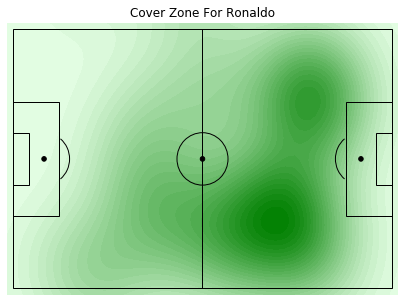

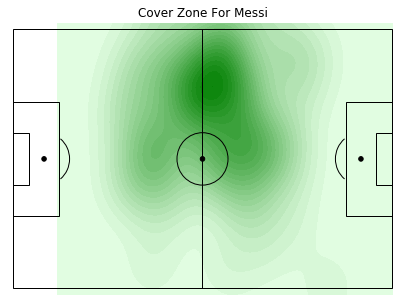

In [40]:
fig=plt.figure() #set up the figures
#fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.title('Cover Zone For Ronaldo')
plt.axis('off')

x_coord = [i[0]['x'] for i in Positions_Event_Ronaldo]
y_coord = [i[0]['y'] for i in Positions_Event_Ronaldo]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
seaborn.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
plt.show()


fig=plt.figure() #set up the figures
#fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.title('Cover Zone For Messi')

plt.axis('off')

x_coord = [i[0]['x'] for i in Positions_Event_Messi]
y_coord = [i[0]['y'] for i in Positions_Event_Messi]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
seaborn.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
plt.show()

In [41]:
# LUCA COMMENT

----

In [42]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Rectangle, ConnectionPatch, Arc
import seaborn

Players = pd.read_json('players/players.json',encoding = "utf-8")
Events = pd.read_json('events/events_Italy.json')
#Teams = pd.read_json('teams/teams.json')
Matches = pd.read_json('matches/matches_Italy.json')

In [43]:
Match_Juventus_Napoli = Matches[Matches['label'] == 'Juventus - Napoli, 0 - 1'].iloc[0]
id_Match_Juventus_Napoli = Match_Juventus_Napoli['wyId']

Player_Jorginho = Players[Players['shortName']=='Jorginho'].iloc[0]
id_Jorginho = Player_Jorginho['wyId']
Player_Miralem_Pjanic = Players[Players['firstName']=='Miralem'].iloc[0]
id_Miralem_Pjanic = Player_Miralem_Pjanic['wyId']

In [44]:
Event_Jorginho = Events[(Events['playerId']==id_Jorginho)&(Events['matchId']==id_Match_Juventus_Napoli)]
Event_Miralem_Pjanic = Events[(Events['playerId']==id_Miralem_Pjanic)&(Events['matchId']==id_Match_Juventus_Napoli)]

In [45]:
Pass_Jorginho = Event_Jorginho[Event_Jorginho['eventName']=='Pass']
Accurate_Pass_Jorginho_list = [] # list contain the row with 1801 tag
for x in range(len(Pass_Jorginho['tags'])):
    if {'id': 1801} in Pass_Jorginho.tags.iloc[x]:
        Accurate_Pass_Jorginho_list.append(Pass_Jorginho.iloc[x])
Accurate_Pass_Jorginho = pd.DataFrame(Accurate_Pass_Jorginho_list)
Pass_Miralem_Pjanic = Event_Miralem_Pjanic[Event_Miralem_Pjanic['eventName']=='Pass']
Accurate_Pass_Miralem_Pjanic_list = [] # list contain the row with 1801 tag
for x in range(len(Pass_Miralem_Pjanic['tags'])):
    if {'id': 1801} in Pass_Miralem_Pjanic.tags.iloc[x]:
        Accurate_Pass_Miralem_Pjanic_list.append(Pass_Miralem_Pjanic.iloc[x])
Accurate_Pass_Miralem_Pjanic = pd.DataFrame(Accurate_Pass_Miralem_Pjanic_list)

In [46]:
Positions_Pass_Jorginho = Pass_Jorginho['positions']
Positions_Accurate_Pass_Jorginho = Accurate_Pass_Jorginho['positions']
Positions_Pass_Miralem_Pjanic = Pass_Miralem_Pjanic['positions']
Positions_Accurate_Pass_Miralem_Pjanic = Accurate_Pass_Miralem_Pjanic['positions']

In [47]:
Positions_Pass_Jorginho

573145    [{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]
573164    [{'y': 44, 'x': 71}, {'y': 42, 'x': 69}]
573188    [{'y': 72, 'x': 47}, {'y': 96, 'x': 61}]
573231    [{'y': 28, 'x': 57}, {'y': 33, 'x': 77}]
573237    [{'y': 25, 'x': 61}, {'y': 13, 'x': 74}]
                            ...                   
574658    [{'y': 26, 'x': 20}, {'y': 10, 'x': 31}]
574736    [{'y': 17, 'x': 67}, {'y': 14, 'x': 77}]
574738    [{'y': 23, 'x': 67}, {'y': 17, 'x': 69}]
574742    [{'y': 28, 'x': 71}, {'y': 21, 'x': 71}]
574769    [{'y': 45, 'x': 67}, {'y': 11, 'x': 80}]
Name: positions, Length: 114, dtype: object

In [48]:
Positions_Pass_Miralem_Pjanic

573105     [{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]
573107    [{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]
573126    [{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]
573220     [{'y': 26, 'x': 25}, {'y': 0, 'x': 31}]
573225    [{'y': 51, 'x': 26}, {'y': 76, 'x': 13}]
573234    [{'y': 62, 'x': 21}, {'y': 82, 'x': 30}]
573247    [{'y': 36, 'x': 17}, {'y': 22, 'x': 13}]
573256      [{'y': 7, 'x': 61}, {'y': 3, 'x': 71}]
573258     [{'y': 5, 'x': 65}, {'y': 17, 'x': 65}]
573267    [{'y': 44, 'x': 47}, {'y': 42, 'x': 51}]
573268    [{'y': 42, 'x': 51}, {'y': 18, 'x': 41}]
573291    [{'y': 81, 'x': 48}, {'y': 63, 'x': 46}]
573293    [{'y': 76, 'x': 43}, {'y': 30, 'x': 37}]
573302     [{'y': 77, 'x': 42}, {'y': 4, 'x': 91}]
573317    [{'y': 44, 'x': 55}, {'y': 15, 'x': 47}]
573334      [{'y': 2, 'x': 54}, {'y': 5, 'x': 64}]
573342     [{'y': 26, 'x': 47}, {'y': 1, 'x': 66}]
573449    [{'y': 48, 'x': 41}, {'y': 35, 'x': 53}]
573586    [{'y': 59, 'x': 26}, {'y': 34, 'x': 38}]
573617    [{'y': 14, 'x': 45}, 

In [49]:
Positions_Accurate_Pass_Jorginho

573145    [{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]
573188    [{'y': 72, 'x': 47}, {'y': 96, 'x': 61}]
573231    [{'y': 28, 'x': 57}, {'y': 33, 'x': 77}]
573237    [{'y': 25, 'x': 61}, {'y': 13, 'x': 74}]
573242    [{'y': 23, 'x': 64}, {'y': 20, 'x': 71}]
                            ...                   
574638    [{'y': 87, 'x': 43}, {'y': 83, 'x': 67}]
574736    [{'y': 17, 'x': 67}, {'y': 14, 'x': 77}]
574738    [{'y': 23, 'x': 67}, {'y': 17, 'x': 69}]
574742    [{'y': 28, 'x': 71}, {'y': 21, 'x': 71}]
574769    [{'y': 45, 'x': 67}, {'y': 11, 'x': 80}]
Name: positions, Length: 98, dtype: object

In [50]:
Positions_Accurate_Pass_Miralem_Pjanic

573105     [{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]
573107    [{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]
573126    [{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]
573225    [{'y': 51, 'x': 26}, {'y': 76, 'x': 13}]
573234    [{'y': 62, 'x': 21}, {'y': 82, 'x': 30}]
573247    [{'y': 36, 'x': 17}, {'y': 22, 'x': 13}]
573256      [{'y': 7, 'x': 61}, {'y': 3, 'x': 71}]
573258     [{'y': 5, 'x': 65}, {'y': 17, 'x': 65}]
573267    [{'y': 44, 'x': 47}, {'y': 42, 'x': 51}]
573268    [{'y': 42, 'x': 51}, {'y': 18, 'x': 41}]
573291    [{'y': 81, 'x': 48}, {'y': 63, 'x': 46}]
573293    [{'y': 76, 'x': 43}, {'y': 30, 'x': 37}]
573302     [{'y': 77, 'x': 42}, {'y': 4, 'x': 91}]
573317    [{'y': 44, 'x': 55}, {'y': 15, 'x': 47}]
573334      [{'y': 2, 'x': 54}, {'y': 5, 'x': 64}]
573342     [{'y': 26, 'x': 47}, {'y': 1, 'x': 66}]
573449    [{'y': 48, 'x': 41}, {'y': 35, 'x': 53}]
573586    [{'y': 59, 'x': 26}, {'y': 34, 'x': 38}]
573617    [{'y': 14, 'x': 45}, {'y': 44, 'x': 27}]
573660    [{'y': 86, 'x': 55}, 

In [51]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

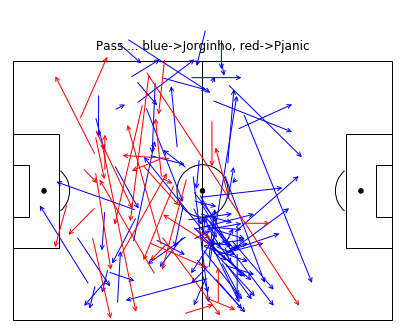

In [97]:
fig=plt.figure() #set up the figures
#fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.title('Pass.... blue->Jorginho, red->Pjanic')
plt.axis('off')
for i in range(len(Positions_Pass_Jorginho)):
    ax.annotate("",xy=(Positions_Pass_Jorginho.iloc[i][1]['x'],Positions_Pass_Jorginho.iloc[i][1]['y']), xytext=(Positions_Pass_Jorginho.iloc[i][0]['x'],Positions_Pass_Jorginho.iloc[i][0]['y']), arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
    
for i in range(len(Positions_Pass_Miralem_Pjanic)):
    ax.annotate("",xy=(Positions_Pass_Miralem_Pjanic.iloc[i][1]['x'],Positions_Pass_Miralem_Pjanic.iloc[i][1]['y']), xytext=(Positions_Pass_Miralem_Pjanic.iloc[i][0]['x'],Positions_Pass_Miralem_Pjanic.iloc[i][0]['y']), arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red")) 

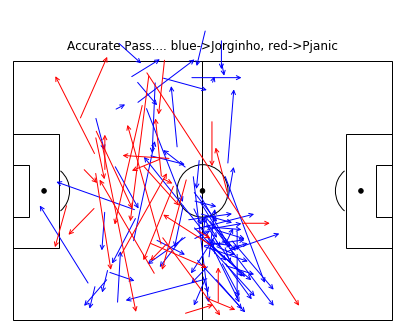

In [98]:
fig=plt.figure() #set up the figures
#fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.title('Accurate Pass.... blue->Jorginho, red->Pjanic')
plt.axis('off')
for i in range(len(Positions_Accurate_Pass_Jorginho)):
    ax.annotate("",xy=(Positions_Accurate_Pass_Jorginho.iloc[i][1]['x'],Positions_Accurate_Pass_Jorginho.iloc[i][1]['y']), xytext=(Positions_Accurate_Pass_Jorginho.iloc[i][0]['x'],Positions_Accurate_Pass_Jorginho.iloc[i][0]['y']), arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
    
for i in range(len(Positions_Accurate_Pass_Miralem_Pjanic)):
    ax.annotate("",xy=(Positions_Accurate_Pass_Miralem_Pjanic.iloc[i][1]['x'],Positions_Accurate_Pass_Miralem_Pjanic.iloc[i][1]['y']), xytext=(Positions_Accurate_Pass_Miralem_Pjanic.iloc[i][0]['x'],Positions_Accurate_Pass_Miralem_Pjanic.iloc[i][0]['y']), arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red")) 

In [70]:
Positions_Pass_Jorginho.iloc[0]

[{'y': 75, 'x': 47}, {'y': 71, 'x': 62}]